# Assignment

In [3]:
%matplotlib inline
from pylab import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, RidgeClassifier
import seaborn as sns

In [4]:
X = pd.read_csv('./dataset/X_train.csv')
y = pd.read_csv('./dataset/y_train.csv')

X_test = pd.read_csv('./dataset/X_test.csv')
print(X.shape)
print(X.columns)
print(y.columns)
X.head()

(85751, 8)
Index(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST'],
      dtype='object')
Index(['FGM'], dtype='object')


,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST
0,1,358,2.4,0,3.2,20.6,2,4.5
1,1,585,8.3,0,1.2,3.0,2,0.5
2,1,540,19.9,0,0.6,3.5,2,3.2
3,1,392,9.0,0,0.9,21.1,2,4.9
4,3,401,22.7,0,0.7,4.1,2,2.9


In [5]:
# Preprocess data
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_std_test = sc_x.fit_transform(X_test)
X_train, X_val, y_train, y_val = train_test_split(
    X_std, y, test_size=0.3, random_state=0)

In [6]:
# Directly apply ridge classifier to raw data w/o any pre-processing
for a in [0, 1, 10, 100, 1000]:
    clf = RidgeClassifier(alpha=a)
    clf.fit(X_train, y_train.values.ravel())
    print(f"[Alpha = {a}]")
    print(f"\tTraining:{clf.score(X_train, y_train):.4f}, Validation:{clf.score(X_val, y_val):.4f}")

[Alpha = 0]
	Training:0.6080, Validation:0.6097
[Alpha = 1]
	Training:0.6080, Validation:0.6097
[Alpha = 10]
	Training:0.6080, Validation:0.6097
[Alpha = 100]
	Training:0.6078, Validation:0.6095
[Alpha = 1000]
	Training:0.6082, Validation:0.6097


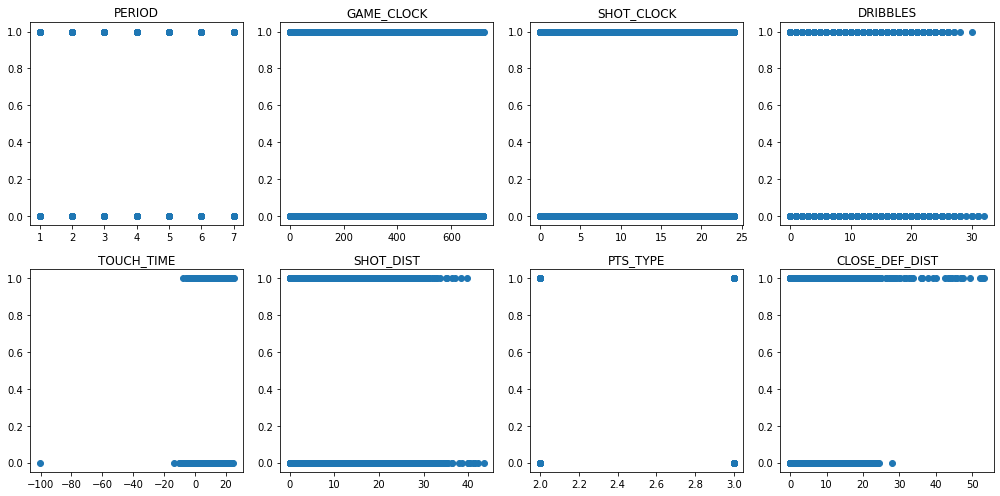

In [7]:
# Show pairwise attribute relation graph

fig, axes = plt.subplots(2, 4, figsize=(14,7))
for r in range(2):
    for c in range(4):
        axes[r][c].scatter(X[X.columns[r*4+c]], y)
        axes[r][c].set_title(X.columns[r*4+c])

plt.tight_layout()
plt.show()

From above graph, I thought that CLOSE_DEF_DIST has relatively strong relation with accuracy.<br>
As for discrete attribute and relatively weak relation like DRIBBLES and SHOT_DIST, 
I conducted the check of numerical relation below.

In [8]:
# Check the numerical relation b/t period and shooting accuracy

for i in range(1, 8):
    tmp = np.where(X['PERIOD']==i)
    print(f"[Period {i}]")
    print(f"\tNumber of data:{len(tmp[0])}")
    print(f"\tAccuracy: {np.sum(y.values[tmp[0]])/len(tmp[0]):.4f}")

[Period 1]
	Number of data:22617
	Accuracy: 0.4605
[Period 2]
	Number of data:21139
	Accuracy: 0.4546
[Period 3]
	Number of data:21694
	Accuracy: 0.4614
[Period 4]
	Number of data:19625
	Accuracy: 0.4387
[Period 5]
	Number of data:550
	Accuracy: 0.3855
[Period 6]
	Number of data:102
	Accuracy: 0.4314
[Period 7]
	Number of data:24
	Accuracy: 0.4167


In [9]:
# Check the numerical relation b/t point type and shooting accuracy

for i in range(2, 4):
    tmp = np.where(X['PTS_TYPE']==i)
    print(f"[Pts type {i}]")
    print(f"\tNumber of data:{len(tmp[0])}")
    print(f"\tAccuracy: {np.sum(y.values[tmp[0]])/len(tmp[0]):.4f}")

[Pts type 2]
	Number of data:63626
	Accuracy: 0.4873
[Pts type 3]
	Number of data:22125
	Accuracy: 0.3573


It seems that there is no strong connection b/t discrete attribute, PERIOD and PTS_TYPE, and accuracy.

[Shooting distance in 0 ~ 10]
	Number of data:37988
	Accuracy: 0.5444
[Shooting distance in 10 ~ 20]
	Number of data:19582
	Accuracy: 0.4123
[Shooting distance in 20 ~ 30]
	Number of data:28070
	Accuracy: 0.3611
[Shooting distance in 30 ~ 40]
	Number of data:104
	Accuracy: 0.1923
[Shooting distance in 40 ~ 50]
	Number of data:7
	Accuracy: 0.0000


Text(0, 0.5, 'Acc')

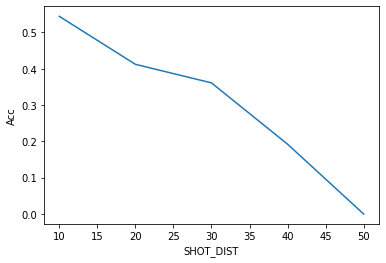

In [10]:
# Check the numerical relation b/t SHOT_DIST and acc.
acc=[]

for i in range(5):
    tmp = np.where((X['SHOT_DIST'] >= 10 * i) & (X['SHOT_DIST'] < 10 * (i + 1)))
    acc.append(np.sum(y.values[tmp[0]])/len(tmp[0]))
    print(f"[Shooting distance in {10 * i} ~ {10 * (i + 1)}]")
    print(f"\tNumber of data:{len(tmp[0])}")
    print(f"\tAccuracy: {acc[len(acc)-1]:.4f}")

plt.plot(range(10, 60, 10), acc)
plt.xlabel("SHOT_DIST")
plt.ylabel("Acc")

In [11]:
# Check the numerical relation b/t DRIBBLES and acc.

for i in range(4):
    tmp = np.where((X['DRIBBLES'] >= 10 * i) & (X['SHOT_DIST'] < 10 * (i + 1)))
    print(f"[Dribbles in {10 * i} ~ {10 * (i + 1)}]")
    print(f"\tNumber of data:{len(tmp[0])}")
    print(f"\tAccuracy: {np.sum(y.values[tmp[0]])/len(tmp[0]):.4f}")

[Dribbles in 0 ~ 10]
	Number of data:37988
	Accuracy: 0.5444
[Dribbles in 10 ~ 20]
	Number of data:3171
	Accuracy: 0.4440
[Dribbles in 20 ~ 30]
	Number of data:387
	Accuracy: 0.4057
[Dribbles in 30 ~ 40]
	Number of data:8
	Accuracy: 0.1250


As for the attributes with continous value, SHOT_DIST and DRIBBLES, there exists a descent trend when value increase.<br>
So I select 'CLOSE_DEF_DIST', 'SHOT_DIST', and 'DRIBBLES' as my feature.

## Test the model w/ only 3 features: 'CLOSE_DEF_DIST', 'SHOT_DIST', and 'DRIBBLES'
I found these 3 features by plotting their relationships and test the numerical calculation.

In [12]:
X_sel = X.drop(['PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'TOUCH_TIME', 'PTS_TYPE'], axis=1)

X_sel_std = sc_x.fit_transform(X_sel)
# X_std_test = sc_x.fit_transform(X_test)
X_sel_train, X_sel_val, y_sel_train, y_sel_val = train_test_split(
    X_sel_std, y, test_size=0.3, random_state=0)

for a in [0, 1, 10, 100, 1000]:
    clf = RidgeClassifier(alpha=a)
    clf.fit(X_sel_train, y_sel_train.values.ravel())
    print(f"[Alpha = {a}]")
    print(f"\tTrain:{clf.score(X_sel_train, y_sel_train):.4f}, Validation:{clf.score(X_sel_val, y_sel_val):.4f}")

[Alpha = 0]
	Train:0.6057, Validation:0.6037
[Alpha = 1]
	Train:0.6057, Validation:0.6038
[Alpha = 10]
	Train:0.6057, Validation:0.6038
[Alpha = 100]
	Train:0.6057, Validation:0.6039
[Alpha = 1000]
	Train:0.6063, Validation:0.6044


The result is slicely worse than X with full attribute.

## Try decision tree and random forest

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
# Decision tree

for depth in range(2, 30, 4):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=depth, 
                                random_state=0)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred = tree.predict(X_val)
    print(f"[Tree depth = {depth}]")
    print('\tAcc. on training: %.2f' % accuracy_score(y_train, y_pred_train))
    print('\tAcc. on validation: %.2f' % accuracy_score(y_val, y_pred))

[Tree depth = 2]
	Acc. on training: 0.61
	Acc. on validation: 0.60
[Tree depth = 6]
	Acc. on training: 0.62
	Acc. on validation: 0.61
[Tree depth = 10]
	Acc. on training: 0.64
	Acc. on validation: 0.61
[Tree depth = 14]
	Acc. on training: 0.68
	Acc. on validation: 0.59
[Tree depth = 18]
	Acc. on training: 0.75
	Acc. on validation: 0.57
[Tree depth = 22]
	Acc. on training: 0.82
	Acc. on validation: 0.56
[Tree depth = 26]
	Acc. on training: 0.88
	Acc. on validation: 0.56


In [15]:
# Random forest
for n in range(50, 301, 50):
    forest = RandomForestClassifier(criterion='entropy',
                                    n_estimators=n, 
                                    random_state=1,
                                    n_jobs=4)
    forest.fit(X_train, y_train.values.ravel())

    y_pred_train = forest.predict(X_train)
    y_pred = forest.predict(X_val)
    print(f"[Number of estimators = {n}]")
    print('\tAcc. on training: %.2f' % accuracy_score(y_train, y_pred_train))
    print('\tAcc. on validation: %.2f' % accuracy_score(y_val, y_pred))

[Number of estimators = 50]
	Acc. on training: 1.00
	Acc. on validation: 0.59
[Number of estimators = 100]
	Acc. on training: 1.00
	Acc. on validation: 0.60
[Number of estimators = 150]
	Acc. on training: 1.00
	Acc. on validation: 0.60
[Number of estimators = 200]
	Acc. on training: 1.00
	Acc. on validation: 0.60
[Number of estimators = 250]
	Acc. on training: 1.00
	Acc. on validation: 0.60
[Number of estimators = 300]
	Acc. on training: 1.00
	Acc. on validation: 0.60


The accuracy of Decision tree and random forest is about 60% to 61%.<br>
There is no obvious imporvment when incresing the value of hyperpoarameters, i.e., 
performance is overfit in decision tree and saturated in random forest.

## Error curve
I choose decision tree model as my best model, and increase the depth of tree to see the error against model complexity.

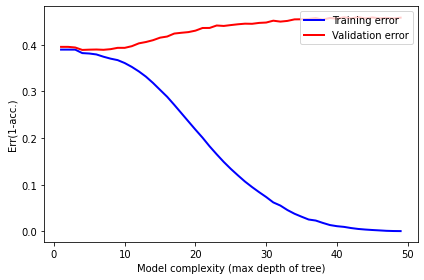

In [17]:
err_train = []
err_val = []
MAX_DEPTH = 50

for depth in range(1, MAX_DEPTH):
    tree = DecisionTreeClassifier(criterion='entropy', 
                                max_depth=depth, 
                                random_state=0)
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred = tree.predict(X_val)
    err_train.append(1 - accuracy_score(y_train, y_pred_train))
    err_val.append(1 - accuracy_score(y_val, y_pred))

plt.plot(range(1, MAX_DEPTH), err_train, label = 'Training error', color = 'blue', linewidth = 2)
plt.plot(range(1, MAX_DEPTH), err_val, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='upper right')
plt.xlabel('Model complexity (max depth of tree)')
plt.ylabel('Err(1-acc.)')
plt.tight_layout()
plt.show()

Obviously, when depth of tree increases, the model becomes overfitting.<br>
The training error gradually decreases while the validation error soars.

## Predict on real testing set
Best model: Decision tree with max depth=8

In [32]:
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
X_std_test = sc_x.fit_transform(X_test)

tree = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=8, 
                            random_state=0)
tree.fit(pd.DataFrame(X_std), y)
y_pred = tree.predict(pd.DataFrame(X_std_test))
pd.DataFrame(y_pred).to_csv('y_pred.csv')

# Brief Report
What I have done in this lab:
- I try to train the model first w/t any operation to overview whole situation.
- Then plot the relationship among all the attributes.
- Select stong relation attribute and do numerical test further.
- Train on a model w/ selected features.
- Try other classifiers such as decision tree and random forest and tune hyperparameters.
- Plot the error curve and test on testing dataset with my best model.
- Write a brief report right here.